In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [58]:
cost_of_living = pd.read_csv('data/Family_Budget_Fact_Sheet(County).csv')
cost_of_living['county_fips'] = cost_of_living['county_fips'].astype(str).apply(lambda x: x.zfill(5))
cost_of_living

,case_id,State abv.,county_fips,County,Family,Housing,Food,Transportation,Healthcare,Other Necessities,...,Healthcare.1,Other Necessities .1,Childcare.1,Taxes.1,Total.1,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
0,1,AL,01001,Autauga County,1p0c,817,335,1110,510,408,...,"$6,120","$4,896",$0,"$7,488","$45,636","83,790",67,8,58,7.0
1,1,AL,01001,Autauga County,1p1c,1114,494,1365,756,570,...,"$9,072","$6,840","$6,240","$9,132","$66,960","83,790",67,8,58,7.0
2,1,AL,01001,Autauga County,1p2c,1114,723,1570,1003,651,...,"$12,036","$7,812","$12,144","$11,388","$84,252","83,790",67,8,58,7.0
3,1,AL,01001,Autauga County,1p3c,1416,966,1670,1249,843,...,"$14,988","$10,116","$13,956","$14,808","$102,492","83,790",67,8,58,7.0
4,1,AL,01001,Autauga County,1p4c,1416,1182,1742,1495,920,...,"$17,940","$11,040","$13,956","$17,688","$112,704","83,790",67,8,58,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3143,WY,56045,Weston County,2p0c,741,637,1613,1304,488,...,"$15,648","$5,856",$0,"$8,028","$65,412","80,178",23,4,2,18.0
31426,3143,WY,56045,Weston County,2p1c,975,793,1791,1698,626,...,"$20,376","$7,512","$6,708","$9,576","$86,880","80,178",23,4,2,18.0
31427,3143,WY,56045,Weston County,2p2c,975,1003,1911,2091,700,...,"$25,092","$8,400","$13,152","$10,548","$103,872","80,178",23,4,2,18.0
31428,3143,WY,56045,Weston County,2p3c,1187,1225,2074,2485,854,...,"$29,820","$10,248","$15,132","$12,756","$121,812","80,178",23,4,2,18.0


In [59]:
population = pd.read_csv('data/counties.csv')
population

,County,State,FIPS Code,Population,Area,Density
0,Autauga County,Alabama,01001,59095,594,99
1,Baldwin County,Alabama,01003,239294,1589,151
2,Barbour County,Alabama,01005,24964,884,28
3,Bibb County,Alabama,01007,22477,622,36
4,Blount County,Alabama,01009,59041,644,92
...,...,...,...,...,...,...
3089,Sweetwater County,Wyoming,56037,41614,10426,4
3090,Teton County,Wyoming,56039,23575,4008,6
3091,Uinta County,Wyoming,56041,20635,2082,10
3092,Washakie County,Wyoming,56043,7705,2240,3


In [60]:
# fixing new york
population.loc[population['State'] == 'New York', 'Density'] = population.loc[population['State'] == 'New York', 'Population']
population[population['State'] == 'New York']

,County,State,FIPS Code,Population,Area,Density
1818,Albany County,New York,36001,588,533,588
1819,Allegany County,New York,36003,44,1034,44
1820,Bronx County,New York,36005,24811,57,24811
1821,Broome County,New York,36007,275,715,275
1822,Cattaraugus County,New York,36009,58,1310,58
...,...,...,...,...,...,...
1875,Washington County,New York,36115,72,846,72
1876,Wayne County,New York,36117,65,1384,65
1877,Westchester County,New York,36119,1995,500,1995
1878,Wyoming County,New York,36121,67,596,67


In [61]:
df = pd.read_csv('data/asecpub23csv/hhpub23.csv', usecols=['HTOTVAL', 'H_NUMPER', 'GTCO', 'GESTFIPS', 'HSUP_WGT', 'HUNDER18'])

# remove all rows with missing data
df = df[(df['GTCO'] != 0) & (df['GESTFIPS'] != 0) & (df['HTOTVAL'] != 0)]
df['Family Type'] = [f"{min(row['H_NUMPER'] - row['HUNDER18'], 2)}p{min(row['HUNDER18'], 4)}c" for index, row in df.iterrows()]
df = df.drop(columns=['HUNDER18'])

df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO,Family Type
50,23,6,60721,177585,11,2p1c
284,23,2,249073,39576,11,2p0c
285,23,2,119153,126961,11,2p0c
289,23,2,52787,128161,11,2p0c
290,23,1,149570,804,11,1p0c
...,...,...,...,...,...,...
88973,15,4,36445,96000,3,2p1c
88974,15,2,68296,173540,3,2p0c
88975,15,6,44578,211102,3,2p2c
88976,15,5,41320,90415,3,2p2c


In [62]:
N = 1_000_000
sample_df = df.sample(n=N, weights=df['HSUP_WGT'], replace=True)
sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO,Family Type
45192,12,2,190409,81461,11,2p0c
13320,42,2,284017,24000,91,1p1c
48318,12,1,397952,35307,101,1p0c
36511,51,2,403771,34958,177,2p0c
86271,6,1,283828,41601,77,1p0c
...,...,...,...,...,...,...
47985,12,3,186592,89000,57,2p1c
48326,12,3,234574,7800,101,2p0c
86080,6,1,469527,70013,97,1p0c
9351,36,4,247864,112270,81,2p2c


In [63]:
# import random

# # 'calculate' time
# sample_df['Free Time'] = [ 1 + random.normalvariate(0,0.2) for _ in range(N)]

# calculating FIPS codes

sample_df['GESTFIPS'] = sample_df['GESTFIPS'].astype(str).apply(lambda x: x.zfill(2))
sample_df['GTCO'] = sample_df['GTCO'].astype(str).apply(lambda x: x.zfill(3))
sample_df['Code'] = sample_df['GESTFIPS'] + sample_df['GTCO']

sample_df = sample_df.drop(columns=['GESTFIPS', 'GTCO'])

# renaming cost of income
sample_df = sample_df.rename(columns={'HTOTVAL': 'Income'})

sample_df


,H_NUMPER,HSUP_WGT,Income,Family Type,Code
45192,2,190409,81461,2p0c,12011
13320,2,284017,24000,1p1c,42091
48318,1,397952,35307,1p0c,12101
36511,2,403771,34958,2p0c,51177
86271,1,283828,41601,1p0c,06077
...,...,...,...,...,...
47985,3,186592,89000,2p1c,12057
48326,3,234574,7800,2p0c,12101
86080,1,469527,70013,1p0c,06097
9351,4,247864,112270,2p2c,36081


In [64]:
# adding population density
sample_df = pd.merge(sample_df, population, left_on='Code', right_on='FIPS Code')
sample_df = sample_df.drop(columns=['FIPS Code'])

sample_df

,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density
0,2,190409,81461,2p0c,12011,Broward County,Florida,1930983,1209,1597
1,1,408822,2168,1p0c,12011,Broward County,Florida,1930983,1209,1597
2,4,257901,162003,2p2c,12011,Broward County,Florida,1930983,1209,1597
3,1,550136,51110,1p0c,12011,Broward County,Florida,1930983,1209,1597
4,2,479398,31514,2p0c,12011,Broward County,Florida,1930983,1209,1597
...,...,...,...,...,...,...,...,...,...,...
986000,4,329049,76000,2p2c,18081,Johnson County,Indiana,164298,320,513
986001,2,318767,105811,2p0c,18081,Johnson County,Indiana,164298,320,513
986002,4,192807,111066,2p2c,18081,Johnson County,Indiana,164298,320,513
986003,1,391380,82456,1p0c,18081,Johnson County,Indiana,164298,320,513


In [65]:
# adding cost of living

cost_of_living['Family'] = cost_of_living['Family'].astype(str)
sample_df['Family Type'] = sample_df['Family Type'].astype(str)

sample_df = pd.merge(sample_df, cost_of_living[['county_fips', 'Family', 'Total.1']], 
                     left_on=['Code', 'Family Type'], 
                     right_on=['county_fips', 'Family'])

sample_df = sample_df.drop(columns=['county_fips'])

sample_df['Cost of Living'] = [int(row['Total.1'].strip("$").replace(',', '_')) for index, row in sample_df.iterrows() ]

sample_df


,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living
0,2,190409,81461,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340
1,2,479398,31514,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340
2,3,403267,134079,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340
3,3,220821,25000,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340
4,2,445256,116779,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985918,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,513,1p1c,"$70,548",70548
985919,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,513,1p1c,"$70,548",70548
985920,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,513,1p1c,"$70,548",70548
985921,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,513,1p1c,"$70,548",70548


In [66]:
land_area = pd.read_csv("data/RDC_Inventory_Core_Metrics_County_History.csv")
# land_area.sort_values('county_fips')
land_area = land_area[(land_area['month_date_yyyymm']) > 2020_00]
land_area['county_fips'] = land_area['county_fips'].astype(str).apply(lambda x: x.zfill(5))
land_area = land_area[['median_square_feet', 'county_fips']]

land_area

,median_square_feet,county_fips
0,1623.0,37199
1,1969.0,42077
2,1782.0,36011
3,2771.0,31093
4,1830.0,48147
...,...,...
155238,1722.0,47131
155239,1768.0,20165
155240,1849.0,30099
155241,1819.0,18131


In [67]:
county_land_area = {}
state_land_area = {}

for index, row in land_area.iterrows():
    code = row['county_fips']
    state = code[:3]

    if code not in county_land_area:
        county_land_area[code] = [index]
    else:
        county_land_area[code].append(index)

    if state not in state_land_area:
        state_land_area[state] = [index]
    else:
        state_land_area[state].append(index)

In [68]:

def select_random_row(county_code):
    if county_code in county_land_area:
        index = random.choice(county_land_area[county_code])
        return land_area.iloc[index]

    state = county_code[:3]
    index = random.choice(state_land_area[state])
    return land_area.iloc[index]

houses = sample_df['Code'].apply(select_random_row)

In [69]:
sample_df = pd.concat([sample_df.reset_index(), houses[['median_square_feet']]], axis=1)
sample_df

,index,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,median_square_feet
0,0,2,190409,81461,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340,1309.0
1,1,2,479398,31514,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340,1440.0
2,2,3,403267,134079,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340,1364.0
3,3,3,220821,25000,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340,1399.0
4,4,2,445256,116779,2p0c,12011,Broward County,Florida,1930983,1209,1597,2p0c,"$68,340",68340,1404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985918,985918,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,513,1p1c,"$70,548",70548,2202.0
985919,985919,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,513,1p1c,"$70,548",70548,2227.0
985920,985920,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,513,1p1c,"$70,548",70548,2169.0
985921,985921,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,513,1p1c,"$70,548",70548,2238.0


In [70]:
# clean up
sample_df = sample_df.rename(columns={"H_NUMPER": "Number of People", "median_square_feet": "Floor Area"})
sample_df['Floor Area'] = sample_df['Floor Area'] * 0.09290304
sample_df['Density'] = sample_df['Density'] * 0.3861274922774502
sample_df

,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area
0,0,2,190409,81461,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,121.610079
1,1,2,479398,31514,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,133.780378
2,2,3,403267,134079,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,126.719747
3,3,3,220821,25000,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,129.971353
4,4,2,445256,116779,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,130.435868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985918,985918,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,198.083404,1p1c,"$70,548",70548,204.572494
985919,985919,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,198.083404,1p1c,"$70,548",70548,206.895070
985920,985920,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,198.083404,1p1c,"$70,548",70548,201.506694
985921,985921,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,198.083404,1p1c,"$70,548",70548,207.917004


In [71]:
import random

# 'calculate' time
sample_df['Free Time'] = [ -0.0005*row['Density'] + 8 + random.normalvariate(0,0.2) for index, row in sample_df.iterrows()]

In [72]:
from modelcat import get_HPFI, get_income_index, get_space_index, get_time_index
import numpy as np

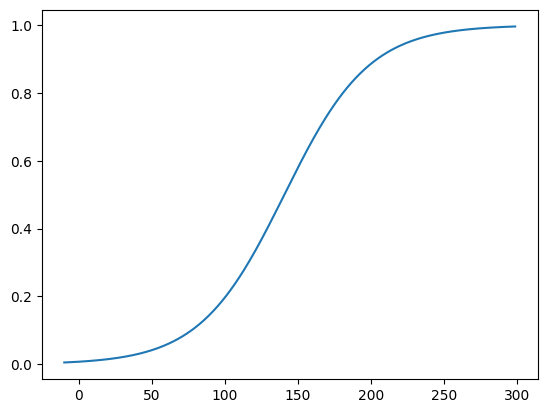

In [73]:
X = np.arange(-10, 300)
Y = np.array([get_space_index(100000000000, 1, x, 0) for x in X])

plt.plot(X,Y)
# get_space_index()

(array([ 35995.,  40134.,  37950.,  42832.,  49713.,  52584.,  53179.,
         47892.,  42313.,  40641.,  41342.,  37822.,  40345.,  35048.,
         38923.,  41938.,  50396.,  64070.,  87604., 105202.]),
 array([0.00112168, 0.05103083, 0.10093998, 0.15084913, 0.20075828,
        0.25066743, 0.30057658, 0.35048573, 0.40039487, 0.45030402,
        0.50021317, 0.55012232, 0.60003147, 0.64994062, 0.69984977,
        0.74975892, 0.79966807, 0.84957722, 0.89948637, 0.94939551,
        0.99930466]),
 <BarContainer object of 20 artists>)

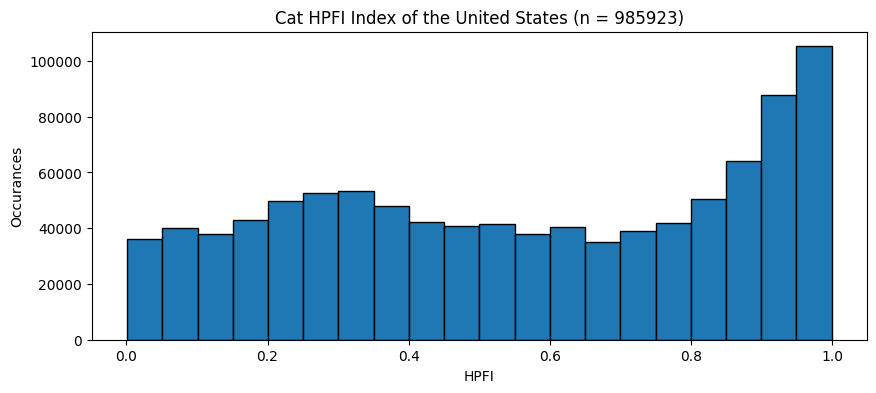

In [74]:
sample_HPFI = []
sample_II   = []
sample_SI   = []
sample_TI   = []

urban_floor_area = []

for index, row in sample_df.iterrows():
    number_of_people    = row['Number of People']
    income              = row['Income']
    free_time           = row['Free Time']
    density             = row['Density']
    cost_of_living      = row['Cost of Living']
    floor_area          = row['Floor Area']

    if density >= 3000:
        if number_of_people == 1:
            floor_area = random.normalvariate(70, 10)
        if number_of_people == 2:
            floor_area = random.normalvariate(90, 10)
        if number_of_people == 3:
            floor_area = random.normalvariate(100, 10)
        if number_of_people == 4:
            floor_area = random.normalvariate(120, 10)
        
        urban_floor_area.append(floor_area)

    outside_area        = 100000/(density+1)

    HPFI    = get_HPFI(density, cost_of_living, income, number_of_people, free_time, floor_area, outside_area)
    II      = get_income_index(income, cost_of_living)
    SI      = get_space_index(density, number_of_people, floor_area, outside_area)
    TI      = get_time_index(free_time)

    sample_HPFI.append(HPFI)
    sample_II.append(II)
    sample_SI.append(SI)
    sample_TI.append(TI)

# sample_HPFI
plt.figure(figsize=(10, 4))
plt.title(f'Cat HPFI Index of the United States (n = {len(sample_HPFI)})')
plt.xlabel('HPFI')
plt.ylabel('Occurances')
plt.hist(sample_HPFI, bins=20, edgecolor="black")


In [75]:
urban_floor_area

[93.5602599758293,
 107.01883755709976,
 85.8409030488119,
 102.09976357075956,
 93.35661884737432,
 86.6594712378793,
 95.89536360845317,
 94.17318643269266,
 93.85413947630954,
 115.33772340504234,
 87.29155523844446,
 112.53741728636564,
 61.16294030955447,
 86.05365541120433,
 85.36336436789466,
 82.73012850750597,
 103.10014732646314,
 100.8951866125181,
 92.4040240513626,
 89.02826958966004,
 82.77114704518439,
 103.94282727771929,
 110.95188934729812,
 101.56712860188374,
 91.65776731136386,
 103.63804588708555,
 98.40516582018046,
 92.59903787697402,
 111.4133354236979,
 94.56817625581232,
 93.6681219756266,
 81.86960850236713,
 90.52230781600173,
 112.45024418492838,
 100.19096262899903,
 89.43585953205428,
 91.01480618838492,
 92.4351428590194,
 97.89996076340485,
 93.57095781225239,
 91.53458442423825,
 95.29987453812284,
 85.75826145825431,
 99.35719075766664,
 106.76810236011566,
 88.09973006099632,
 97.91911988530494,
 94.90711034694458,
 103.29590417334191,
 112.56464434

In [76]:
sample_df['HPFI'] = sample_HPFI
sample_df['Income Index'] = sample_II
sample_df['Space Index'] = sample_SI
sample_df['Time Index'] = sample_TI

sample_df

,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
0,0,2,190409,81461,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,121.610079,7.626847,0.576153,0.466214,0.508212,0.997549
1,1,2,479398,31514,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,133.780378,7.732380,0.228864,0.067063,0.611287,0.997923
2,2,3,403267,134079,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,126.719747,7.699235,0.768479,0.923829,0.409541,0.997811
3,3,3,220821,25000,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,129.971353,7.738841,0.180501,0.049341,0.436917,0.997944
4,4,2,445256,116779,2p0c,12011,Broward County,Florida,1930983,1209,616.645605,2p0c,"$68,340",68340,130.435868,7.401578,0.798563,0.836245,0.583545,0.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985918,985918,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,198.083404,1p1c,"$70,548",70548,204.572494,7.785080,0.150630,0.023185,0.959529,0.998089
985919,985919,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,198.083404,1p1c,"$70,548",70548,206.895070,7.811877,0.150751,0.023185,0.962528,0.998169
985920,985920,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,198.083404,1p1c,"$70,548",70548,201.506694,7.901135,0.150473,0.023185,0.955216,0.998414
985921,985921,2,257778,12002,1p1c,18081,Johnson County,Indiana,164298,320,198.083404,1p1c,"$70,548",70548,207.917004,8.043162,0.150822,0.023185,0.963779,0.998743


In [77]:
len(sample_df[sample_df['HPFI'] > 0.5]) / len(sample_df)

0.5505957361781803

In [78]:
sample_df.describe()
# sample_df

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,985923.000000,985923.000000,9.859230e+05,9.859230e+05,9.859230e+05,985923.000000,985923.000000,985923.000000,985923.000000,985923.000000,985923.000000,985923.000000,985923.000000,985923.000000
mean,492961.000000,2.441473,3.240215e+05,1.149703e+05,1.436169e+06,1573.196258,1424.436051,75378.858572,168.847436,7.287490,0.556683,0.485991,0.730014,0.965275
std,284611.599063,1.425704,1.287734e+05,1.338127e+05,2.315619e+06,2141.837896,3605.539306,28450.189324,33.392224,1.814162,0.305415,0.380891,0.263241,0.151732
min,0.000000,1.000000,2.230600e+04,-9.998000e+03,1.690000e+02,26.000000,8.494805,36864.000000,82.869512,-5.984725,0.001122,0.000013,0.000098,0.000033
25%,246480.500000,1.000000,2.276240e+05,4.000400e+04,2.289390e+05,444.000000,167.193204,55764.000000,151.246149,7.498176,0.288668,0.107773,0.623908,0.997012
50%,492961.000000,2.000000,3.078810e+05,8.000000e+04,5.850080e+05,738.000000,415.859309,67968.000000,168.990630,7.748598,0.560915,0.412008,0.835267,0.997975
75%,739441.500000,3.000000,4.165490e+05,1.445020e+05,1.478194e+06,1513.000000,877.281662,87336.000000,186.549304,7.942538,0.858464,0.921732,0.924818,0.998517
max,985922.000000,16.000000,1.072820e+06,2.550898e+06,9.829544e+06,9224.000000,26557.076664,243300.000000,297.754243,8.888710,0.999305,1.000000,0.999008,0.999714


In [79]:
sample_rural = sample_df[sample_df['Density'] <= 100]
sample_suburban = sample_df[(sample_df['Density'] <= 3_200) & (sample_df['Density'] > 100)]
sample_urban = sample_df[sample_df['Density'] >= 3_200]

In [80]:
sample_rural.describe()

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,143279.000000,143279.000000,143279.000000,1.432790e+05,1.432790e+05,143279.000000,143279.000000,143279.000000,143279.000000,143279.000000,143279.000000,143279.000000,143279.000000,143279.000000
mean,650058.291159,2.453709,307136.941492,9.448829e+04,3.015613e+05,2550.749189,60.142525,67438.118412,176.974274,7.970121,0.588428,0.465237,0.859200,0.998512
std,267031.994806,1.445132,134259.856432,1.037267e+05,2.597022e+05,2435.771537,25.327201,24685.313549,23.467598,0.200082,0.290768,0.362874,0.139248,0.000493
min,39324.000000,1.000000,22306.000000,-9.998000e+03,1.690000e+02,418.000000,8.494805,37656.000000,118.915891,7.061754,0.005435,0.000036,0.051825,0.994311
25%,384238.500000,1.000000,210668.000000,3.600000e+04,1.531010e+05,804.000000,37.454367,51024.000000,160.815162,7.834816,0.341578,0.123260,0.823057,0.998235
50%,701000.000000,2.000000,291429.000000,6.836100e+04,2.026780e+05,1390.000000,62.938781,60228.000000,173.542879,7.970182,0.589925,0.374481,0.907244,0.998583
75%,876616.500000,3.000000,408437.000000,1.213070e+05,3.625330e+05,3357.000000,82.631283,78192.000000,188.686074,8.105583,0.881285,0.860836,0.949906,0.998866
max,984130.000000,12.000000,779051.000000,2.263498e+06,1.052030e+06,9189.000000,99.234766,202368.000000,281.589114,8.888710,0.998332,1.000000,0.998841,0.999714


In [81]:
sample_suburban.describe()
# sample_suburban

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,748979.000000,748979.000000,7.489790e+05,7.489790e+05,7.489790e+05,748979.000000,748979.000000,748979.000000,748979.000000,748979.000000,748979.000000,748979.000000,748979.000000,748979.000000
mean,486065.015644,2.468659,3.223200e+05,1.183504e+05,1.763010e+06,1572.218289,565.558535,75514.683087,173.882539,7.716894,0.586578,0.496810,0.778588,0.997624
std,281056.164965,1.427356,1.271092e+05,1.365257e+05,2.554728e+06,2108.054648,449.005298,28642.408197,30.253711,0.300472,0.299293,0.380929,0.196562,0.001413
min,0.000000,1.000000,2.919700e+04,-9.593000e+03,2.810000e+02,57.000000,101.165403,36864.000000,82.869512,5.910560,0.002391,0.000013,0.000098,0.974725
25%,241024.500000,1.000000,2.265190e+05,4.200000e+04,4.123000e+05,477.000000,213.142376,55764.000000,155.705495,7.547618,0.318166,0.114290,0.688450,0.997230
50%,491839.000000,2.000000,3.049230e+05,8.200000e+04,7.894100e+05,738.000000,495.401573,67968.000000,170.569981,7.743448,0.617512,0.435216,0.843011,0.997959
75%,732702.500000,3.000000,4.143860e+05,1.500000e+05,1.648556e+06,1407.000000,793.491997,87684.000000,188.500268,7.920642,0.876706,0.931258,0.925446,0.998463
max,985922.000000,16.000000,1.072820e+06,2.550898e+06,9.829544e+06,9224.000000,2619.875035,243300.000000,297.754243,8.843856,0.999305,1.000000,0.999008,0.999689


In [82]:
sample_urban.describe()
# sample_urban

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,93665.000000,93665.000000,93665.000000,9.366500e+04,9.366500e+04,93665.000000,93665.000000,93665.000000,93665.000000,93665.000000,93665.000000,93665.000000,93665.000000,93665.000000
mean,307792.630673,2.205360,363455.722661,1.192730e+05,5.582434e+05,85.657385,10379.284018,86439.677446,116.153349,2.809606,0.269073,0.431227,0.143987,0.655755
std,198750.694951,1.359332,125564.256582,1.490704e+05,7.449600e+05,53.019965,6803.666573,28438.408147,22.252083,3.409018,0.211738,0.400942,0.054540,0.369407
min,40648.000000,1.000000,120603.000000,2.000000e+00,1.307500e+04,26.000000,3459.702331,43140.000000,87.793373,-5.984725,0.001122,0.000069,0.001935,0.000033
25%,153006.000000,1.000000,267392.000000,3.500000e+04,2.725500e+04,33.000000,5048.616962,67560.000000,100.799798,2.370698,0.073388,0.037528,0.108902,0.573522
50%,273196.000000,2.000000,342903.000000,7.924100e+04,4.669400e+04,58.000000,9580.209211,79824.000000,112.784291,3.468073,0.217581,0.291054,0.140202,0.768537
75%,461085.000000,3.000000,451730.000000,1.500010e+05,8.152010e+05,143.000000,10523.904802,92028.000000,124.025558,5.466380,0.464336,0.908795,0.175761,0.958469
max,874829.000000,10.000000,897105.000000,2.200009e+06,2.269675e+06,178.000000,26557.076664,205152.000000,208.753131,7.003008,0.907275,1.000000,0.685139,0.993817


In [83]:
len(sample_urban[sample_urban['HPFI'] > 0.5]) / len(sample_urban), \
len(sample_suburban[sample_suburban['HPFI'] > 0.5]) / len(sample_suburban), \
len(sample_rural[sample_rural['HPFI'] > 0.5]) / len(sample_rural)

(0.21839534511290237, 0.5870471668765079, 0.5772164797353415)

In [84]:
len(sample_df[sample_df['HPFI'] > 0.5]) / len(sample_df)

0.5505957361781803

In [ ]:
import winsound
winsound.Beep(1000, 200)